<a href="https://colab.research.google.com/github/veeruamma/DLCVNLP/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
ROOT ='/content/drive/MyDrive/DLCVNLP'

In [76]:
import os
os.chdir(ROOT)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import joblib 
import pandas as pd

plt.style.use('fivethirtyeight')

# Logic gates (OR, AND) implementation using Perceptron

In [78]:
class Perceptron:
  def __init__(self, eta, epochs, activationFucntion):
    self.weights = np.random.randn(3) * 1e-4
    print(f"weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
    self.activationFucntion = activationFucntion
  
  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] #concatenating the bias terms with input
    print(f"X_with_bias: \n {X_with_bias}")
    for epoch in range(self.epochs):
      print(f"for epoch : {epoch}")
      y_hat = self.activationFucntion(X_with_bias, self.weights)
      print(f"predicted value : {y_hat}")
      error = self.y - y_hat
      print(f"error : \n {error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights : {self.weights}")
      print("################ \n")
  
  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFucntion(X_with_bias, self.weights)




In [79]:
activationFunction = lambda inputs, weights : np.where(np.dot(inputs, weights) > 0, 1, 0)

```python
def activationFunction(inputs, weights):
  z = np.dot(inputs, weights)
  y_hat = np.where(z>0, 1, 0)
  return y_hat


  def activationFunction(inputs, weights):
    z = np.dot(inputs, weights)
    if(z>0):
      y_hat =1
    else:
      y_hat =0
    return y_hat
  ```

# AND Gate Implementation


In [80]:
data = {"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [81]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [82]:
y = AND["y"]
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [83]:
model = Perceptron(eta=0.01, epochs=10, activationFucntion= activationFunction)

weights: [ 3.23323166e-05 -5.36747933e-05  1.16740523e-05]


In [84]:
model.fit(X, y)

X_with_bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch : 0
predicted value : [0 0 1 0]
error : 
 0    0
1    0
2   -1
3    1
Name: y, dtype: int64
updated weights : [3.23323166e-05 9.94632521e-03 1.16740523e-05]
################ 

for epoch : 1
predicted value : [0 1 1 1]
error : 
 0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights : [-9.96766768e-03 -5.36747933e-05  2.00116741e-02]
################ 

for epoch : 2
predicted value : [0 0 0 0]
error : 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights : [3.23323166e-05 9.94632521e-03 1.00116741e-02]
################ 

for epoch : 3
predicted value : [0 0 0 0]
error : 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights : [1.00323323e-02 1.99463252e-02 1.16740523e-05]
################ 

for epoch : 4
predicted value : [0 1 1 1]
error : 
 0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights : [3.23323166e-05 9.94632521e-03 2.00116741e-02]
##########

In [85]:
model.predict(X)

array([0, 0, 0, 1])

# OR Gate Implementation

In [86]:
data = {"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [87]:
y = OR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [88]:
X = OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [89]:
model = Perceptron(eta=0.01, epochs=10, activationFucntion= activationFunction)

weights: [-5.93812396e-05 -8.01434592e-05  1.44211282e-04]


In [90]:
model.fit(X, y)

X_with_bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch : 0
predicted value : [0 0 0 0]
error : 
 0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights : [ 0.01994062  0.01991986 -0.02985579]
################ 

for epoch : 1
predicted value : [1 1 1 1]
error : 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights : [ 0.01994062  0.01991986 -0.01985579]
################ 

for epoch : 2
predicted value : [1 1 1 1]
error : 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights : [ 0.01994062  0.01991986 -0.00985579]
################ 

for epoch : 3
predicted value : [1 1 1 1]
error : 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights : [0.01994062 0.01991986 0.00014421]
################ 

for epoch : 4
predicted value : [0 1 1 1]
error : 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights : [0.01994062 0.01991986 0.00014421]
################ 

for epoch : 5
predicted value : [0 1 1 1]
err

# XOR Gate Implementation

In [94]:
data = {"x1":[0,0,1,1], "x2":[0,1,0,1], "y":[0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [95]:
X = XOR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [96]:
y = XOR["y"]
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [100]:
model = Perceptron(eta=0.01, epochs=50, activationFucntion= activationFunction)

weights: [ 3.20866531e-05 -1.03856934e-04  8.48404005e-05]


In [101]:
model.fit(X, y)

X_with_bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch : 0
predicted value : [0 0 0 0]
error : 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights : [ 0.01003209  0.00989614 -0.01991516]
################ 

for epoch : 1
predicted value : [1 1 1 1]
error : 
 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights : [ 3.20866531e-05 -1.03856934e-04  8.48404005e-05]
################ 

for epoch : 2
predicted value : [0 0 0 0]
error : 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights : [ 0.01003209  0.00989614 -0.01991516]
################ 

for epoch : 3
predicted value : [1 1 1 1]
error : 
 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights : [ 3.20866531e-05 -1.03856934e-04  8.48404005e-05]
################ 

for epoch : 4
predicted value : [0 0 0 0]
error : 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights : [ 0.01003209  0.00989614 -0.01991516]
################ 

for epoch : 5
p

In [102]:
 model.predict(X)

array([0, 0, 0, 0])

# Analysis with visulaization

1. AND Gate :  From the plot below, we can clearly classify the data points using a single lie (Linear classification)



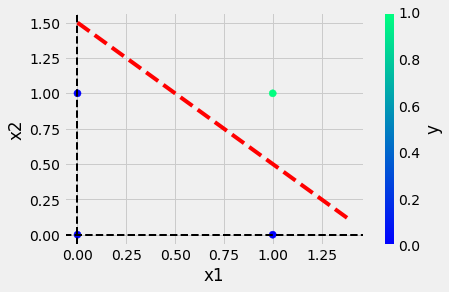

In [110]:
AND.plot(kind = "scatter", x="x1", y= "x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth =2)
plt.axvline(x=0, color="black", linestyle="--", linewidth =2)
plt.plot(np.linspace(0, 1.4), 1.5 - 1*np.linspace(0, 1.4), "r--")

# x = np.linspace(0, 1.4) >> linespace gives 50 values by defualt 
# y = 1.5 - 1*np.linspace(0, 1.4) => y=mx+c

2. OR Gate : From the plot below, we can clearly classify the data points using a single lie (Linear classification)

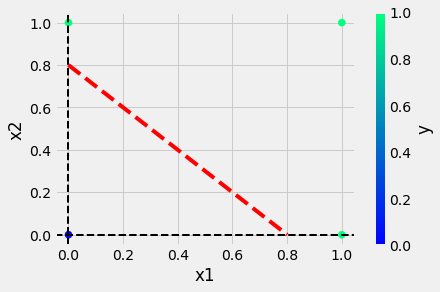

In [121]:
OR.plot(kind = "scatter", x="x1", y= "x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth =2)
plt.axvline(x=0, color="black", linestyle="--", linewidth =2)
plt.plot(np.linspace(0, 0.8), 0.8 - 1*np.linspace(0, 0.8), "r--")

3. XOR Gate : Can we classify using single line like we can do for OR and AND gate examples? 

The answer is : NO, as we can see from the plot below, it's not possible. Hence, Perceptron can only solve linear data problems and not suitable for Non-linear data problems.

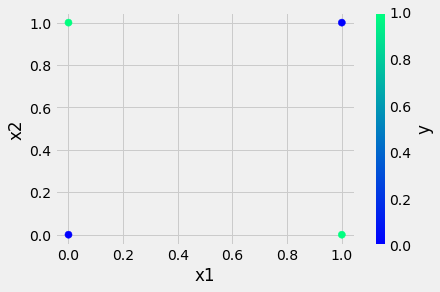

In [106]:
XOR.plot(kind = "scatter", x="x1", y= "x2", c="y", s=50, cmap="winter")